<a href="https://colab.research.google.com/github/sana-f-shah/Solar-Panel-Analytics/blob/main/notebooks/2a_eda_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_parquet('/content/drive/MyDrive/Portfolio/Solar Panel Analytics/data_versions/original.parquet')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

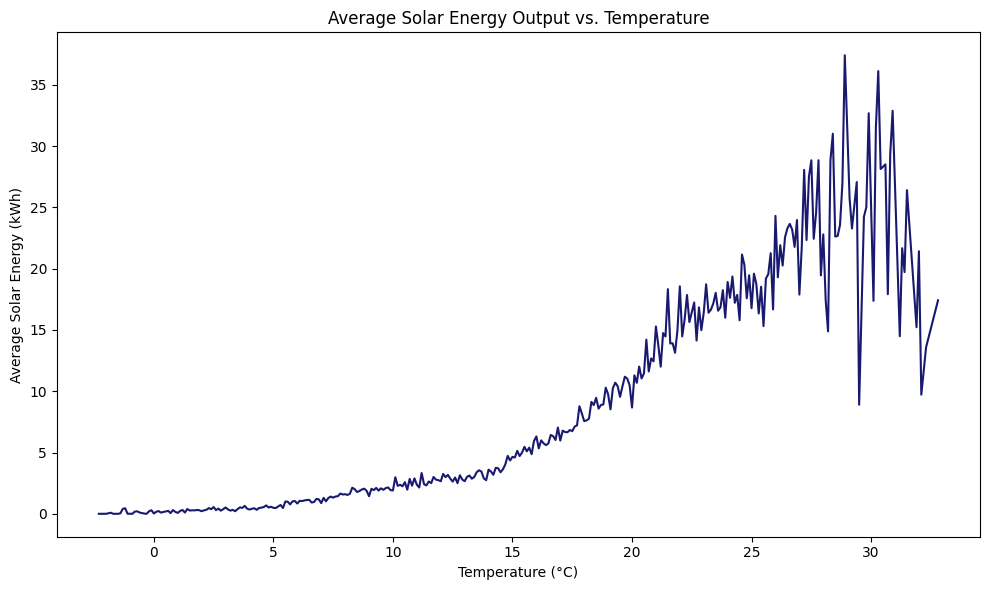

Optimal Temperature: 28.9°C with 37.41 kWh of solar energy


In [ ]:
avg_solar_by_temp = df.groupby('TempOut')['SolarEnergy'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_solar_by_temp, x='TempOut', y='SolarEnergy', color='#191970')
plt.title('Average Solar Energy Output vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Solar Energy (kWh)')
plt.tight_layout()
plt.show()

optimal_temp = avg_solar_by_temp.loc[avg_solar_by_temp['SolarEnergy'].idxmax()]
print(f"Optimal Temperature: {optimal_temp['TempOut']}°C with {optimal_temp['SolarEnergy']} kWh of solar energy")

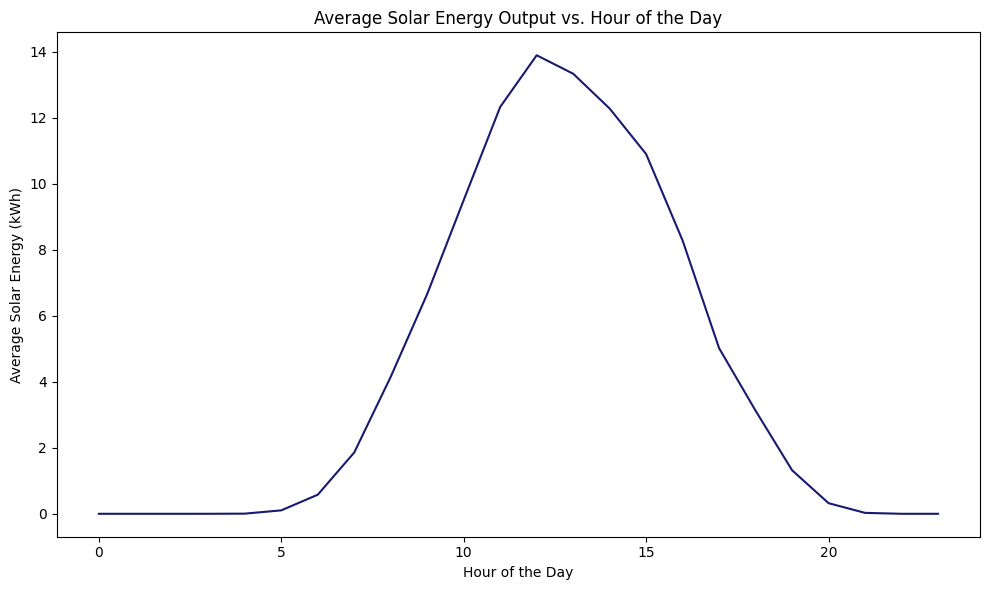

Optimal Hour: 12.0 with 13.894773531493275 kWh of solar energy


In [ ]:
df_copy = df.copy()

df_copy['Timestamp'] = pd.to_datetime(df_copy['Date'].astype(str) + ' ' + df['Time'].astype(str))
df_copy['Hour'] = df_copy['Timestamp'].dt.hour

avg_solar_by_hour = df_copy.groupby('Hour')['SolarEnergy'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_solar_by_hour, x='Hour', y='SolarEnergy', color='#191970')
plt.title('Average Solar Energy Output vs. Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Solar Energy (kWh)')
plt.tight_layout()
plt.show()

optimal_hour = avg_solar_by_hour.loc[avg_solar_by_hour['SolarEnergy'].idxmax()]
print(f"Optimal Hour: {optimal_hour['Hour']} with {optimal_hour['SolarEnergy']} kWh of solar energy")

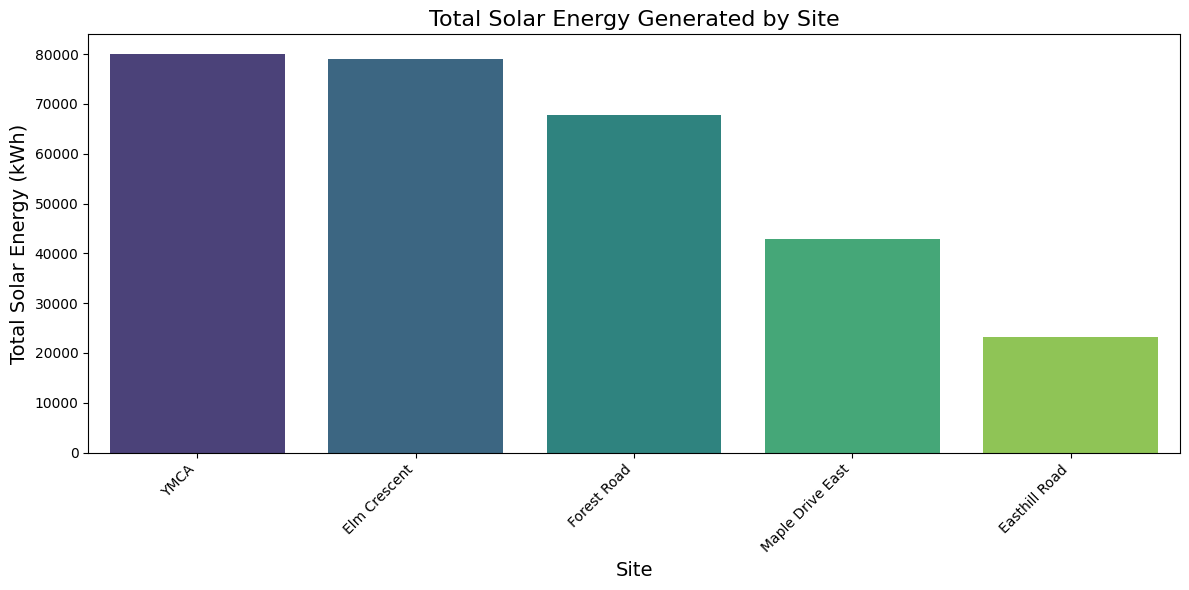

Most energy produced by: YMCA with 79975.39 kWh of energy


In [ ]:
total_solar_by_site = df.groupby('Site')['SolarEnergy'].sum().reset_index()
total_solar_by_site = total_solar_by_site.sort_values(by='SolarEnergy', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Site', y='SolarEnergy', data=total_solar_by_site, hue='Site', palette='viridis')

plt.title('Total Solar Energy Generated by Site', fontsize=16)
plt.xlabel('Site', fontsize=14)
plt.ylabel('Total Solar Energy (kWh)', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

most_energy_site = total_solar_by_site.iloc[0]
most_energy_text = f"Most energy produced by: {most_energy_site['Site']} with {most_energy_site['SolarEnergy']} kWh of energy"
print(most_energy_text)

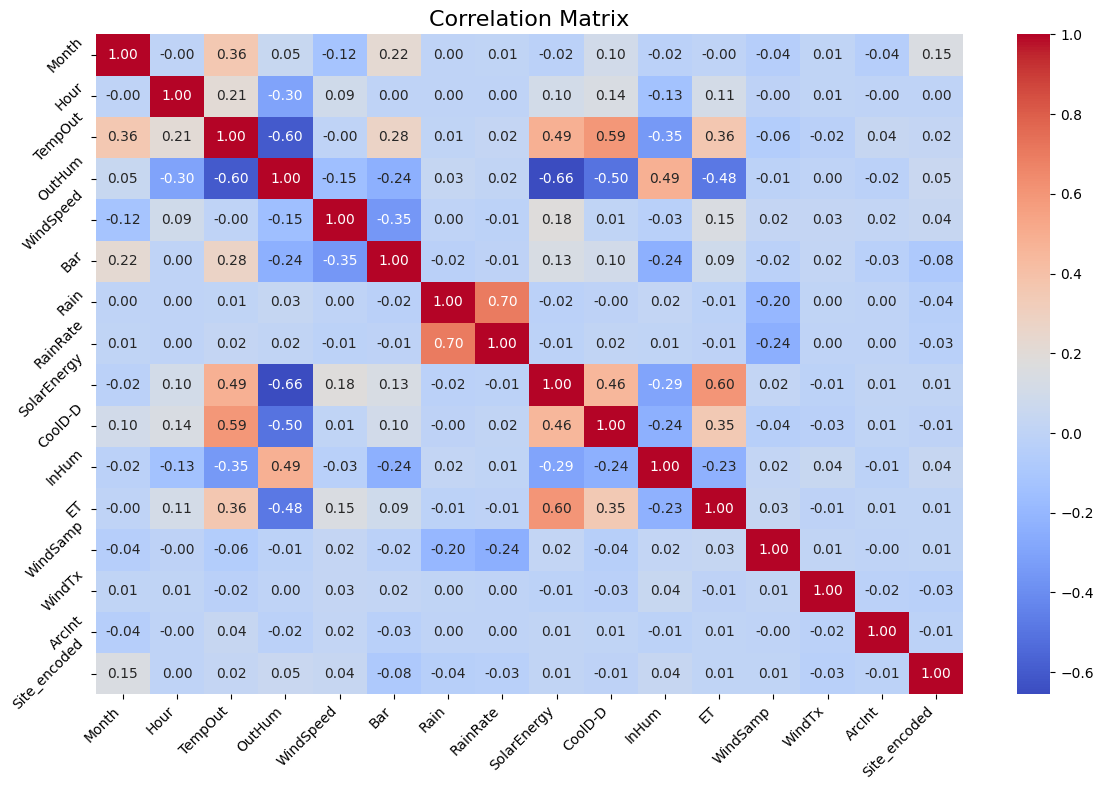

In [ ]:
df['Site_encoded'] = df['Site'].astype('category').cat.codes

numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns='Site_encoded', inplace=True)

high_corr_pairs = []

sites = df['Site'].unique()

for i, site_1 in enumerate(sites):
    for site_2 in sites[i+1:]:
        df_filtered = df[df['Site'].isin([site_1, site_2])]

        numerical_df = df_filtered.select_dtypes(include=['number'])

        correlation_matrix = numerical_df.corr()

        for col_1 in numerical_df.columns:
            for col_2 in numerical_df.columns:
                if col_1 != col_2:
                    corr_value = correlation_matrix.loc[col_1, col_2]
                    if abs(corr_value) > 0.7:
                        high_corr_pairs.append({
                            'Site 1': site_1,
                            'Site 2': site_2,
                            'Column 1': col_1,
                            'Column 2': col_2,
                            'Correlation': corr_value
                        })

high_corr_df = pd.DataFrame(high_corr_pairs)

print("Highly Correlated Pairs Between Sites:")
print(high_corr_df.to_string(index=False))

Highly Correlated Pairs Between Sites:
          Site 1           Site 2 Column 1 Column 2  Correlation
            YMCA Maple Drive East   OutHum    InHum     0.843820
            YMCA Maple Drive East    InHum   OutHum     0.843820
            YMCA      Forest Road     Rain RainRate     0.809874
            YMCA      Forest Road RainRate     Rain     0.809874
            YMCA    Easthill Road     Rain RainRate     0.748949
            YMCA    Easthill Road RainRate     Rain     0.748949
Maple Drive East      Forest Road     Rain RainRate     0.809921
Maple Drive East      Forest Road RainRate     Rain     0.809921
Maple Drive East    Easthill Road   OutHum    InHum     0.701699
Maple Drive East    Easthill Road     Rain RainRate     0.748945
Maple Drive East    Easthill Road RainRate     Rain     0.748945
Maple Drive East    Easthill Road    InHum   OutHum     0.701699
     Forest Road    Easthill Road   OutHum    InHum     0.738453
     Forest Road    Easthill Road     Rain RainRate

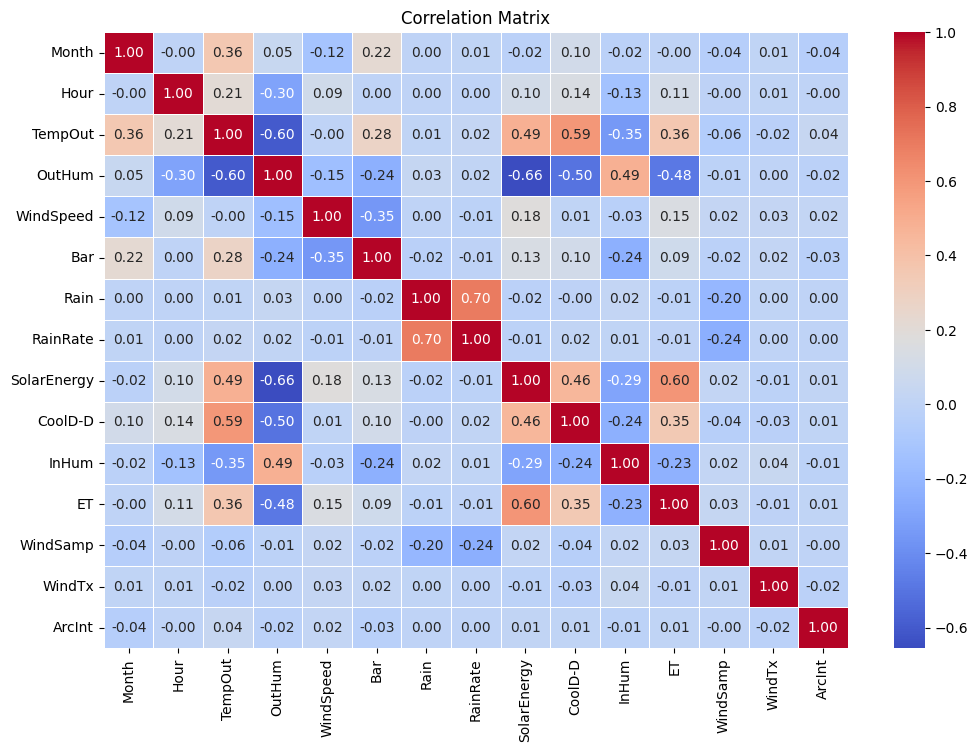

Correlations with Solar Energy Output:
SolarEnergy    1.000000
ET             0.604292
TempOut        0.487118
CoolD-D        0.455444
WindSpeed      0.182899
Bar            0.133508
Hour           0.101667
WindSamp       0.021125
ArcInt         0.012661
RainRate      -0.010277
WindTx        -0.012168
Rain          -0.016191
Month         -0.020801
InHum         -0.293959
OutHum        -0.655476
Name: SolarEnergy, dtype: float64


In [ ]:
import numpy as np

corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

target_corr = corr_matrix['SolarEnergy'].sort_values(ascending=False)
print("Correlations with Solar Energy Output:")
print(target_corr)

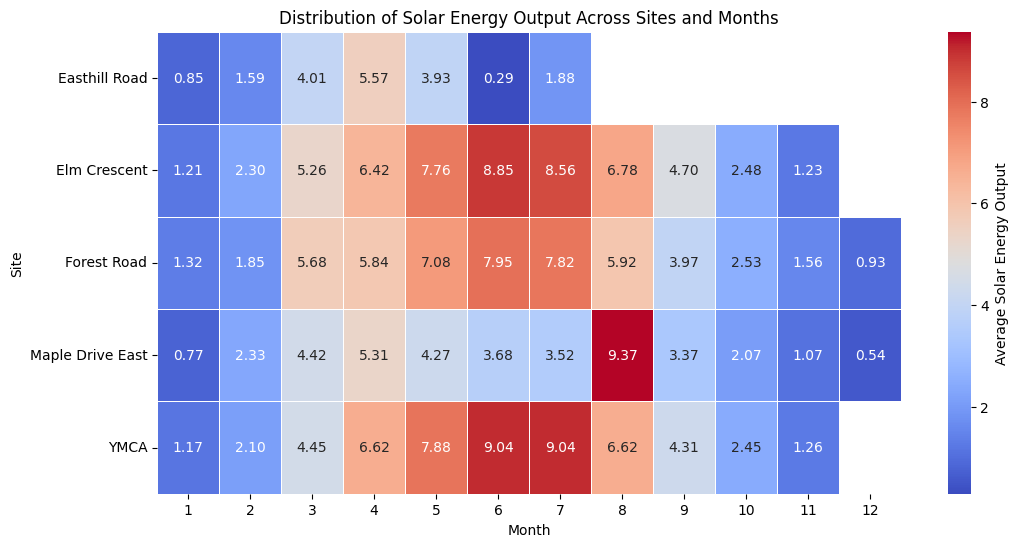

In [ ]:
solar_by_site_month = df.groupby(['Site', 'Month'])['SolarEnergy'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(solar_by_site_month, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Average Solar Energy Output'}, linewidths=0.5)
plt.title('Distribution of Solar Energy Output Across Sites and Months')
plt.xlabel('Month')
plt.ylabel('Site')
plt.show()

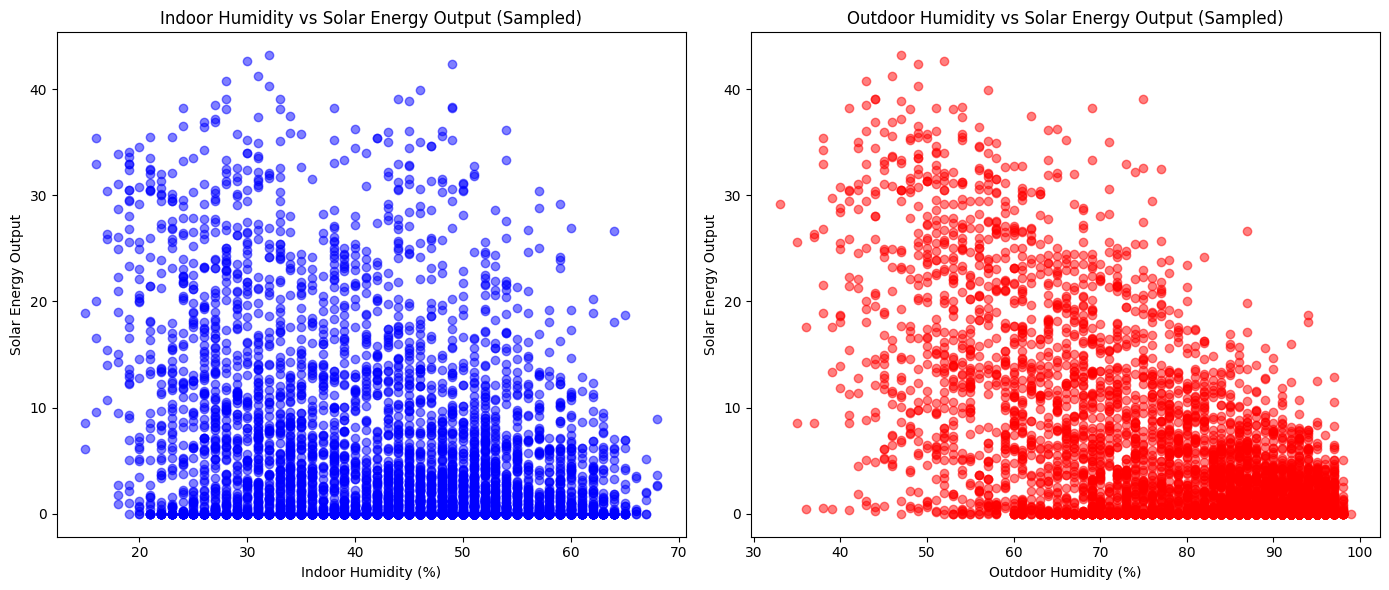

Correlation between Indoor Humidity and Solar Energy Output (sampled): -0.29
Correlation between Outdoor Humidity and Solar Energy Output (sampled): -0.65


In [ ]:
sampled_df = df.sample(frac=0.1, random_state=42)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(sampled_df['InHum'], sampled_df['SolarEnergy'], alpha=0.5, color='blue')
plt.title('Indoor Humidity vs Solar Energy Output (Sampled)')
plt.xlabel('Indoor Humidity (%)')
plt.ylabel('Solar Energy Output')

plt.subplot(1, 2, 2)
plt.scatter(sampled_df['OutHum'], sampled_df['SolarEnergy'], alpha=0.5, color='red')
plt.title('Outdoor Humidity vs Solar Energy Output (Sampled)')
plt.xlabel('Outdoor Humidity (%)')
plt.ylabel('Solar Energy Output')

plt.tight_layout()
plt.show()

correlation_inhum = sampled_df['InHum'].corr(sampled_df['SolarEnergy'])
correlation_outhum = sampled_df['OutHum'].corr(sampled_df['SolarEnergy'])

print(f"Correlation between Indoor Humidity and Solar Energy Output (sampled): {correlation_inhum:.2f}")
print(f"Correlation between Outdoor Humidity and Solar Energy Output (sampled): {correlation_outhum:.2f}")